In [2]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils
from sklearn.metrics import calinski_harabasz_score

%load_ext autoreload
%autoreload 2

In [3]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

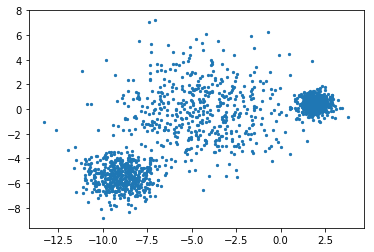

In [4]:
X = varied[0]
ClusterUtils.visualize_sample_data(X)

In [8]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['AgglomerativeClustering'], 
                                       n_evaluations=50, seed=27, run_obj='quality', cutoff_time=10, shared_model=True,
                                       evaluator=lambda X, y_pred: float('inf') if len(set(y_pred)) == 1 \
                                                else -1 * calinski_harabasz_score(X, y_pred)  
                                      )

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    clustering_choice, Type: Categorical, Choices: {AgglomerativeClustering}, Default: AgglomerativeClustering
    linkage___AgglomerativeClustering, Type: Categorical, Choices: {ward, complete, average, single}, Default: complete
    n_clusters___AgglomerativeClustering, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    affinity___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    linkage___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
    n_clusters___AgglomerativeClustering | clustering_choice in {'AgglomerativeClustering'}
  Forbidden Clauses:
    (Forbidden: linkage___AgglomerativeClustering == 'ward' && Forbidden: affinity___AgglomerativeClustering in {'cityblock', 'cosine', 'l1', 'l2', 'manhattan'})



Optimization is complete.
Took 4.503475666046143 seconds, the optimal configuration is 
Configuration:
  affinity___AgglomerativeClustering, Value: 'euclidean'
  clustering_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'ward'
  n_clusters___AgglomerativeClustering, Value: 3



In [9]:
opt_result

Configuration:
  affinity___AgglomerativeClustering, Value: 'euclidean'
  clustering_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'ward'
  n_clusters___AgglomerativeClustering, Value: 3

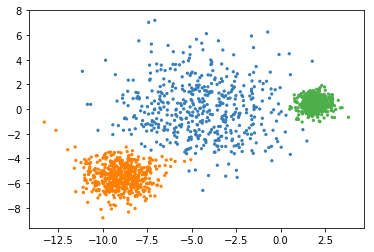

array([0, 0, 1, ..., 2, 2, 2])

In [10]:
autocluster.predict(X)

In [11]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=9.441375732421875e-05),
 TrajEntry(train_perf=-2711.797170352057, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=1, ta_time_used=0.09322309494018555, wallclock_time=0.10196948051452637),
 TrajEntry(train_perf=-3412.0145948103277, incumbent_id=2, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   clustering_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'ward'

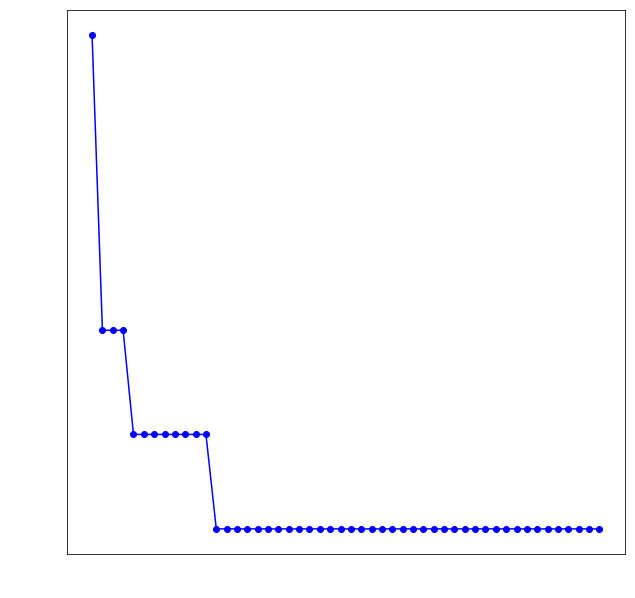

In [12]:
autocluster.plot_convergence()